# Deck 3: Reproducibility

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

### Activity: Commenting our code

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_78467/3600079171.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


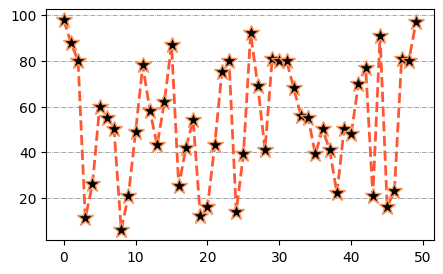

In [3]:
# I'm adding some of the code from Session 1 back in here to do some commenting!

# Create sample data
np.random.seed(613) # set random seed for reproducibility
x = np.arange(50) # x values from 0 to 49
y = np.random.randint(0, 100,50) # 50 random integers between 0 and 100

# I really like scatter plots for showing relationships between two continuous variables.
fig, ax = plt.subplots(figsize=(5, 3)) # create figure and axis objects
ax.plot(x,
        y,
        marker='*', # for the star marker style
        markersize = 12, # marker size
        color = '#FF5733', # marker color
        linestyle = '--', # line style
        linewidth = 2, # line width
        markeredgecolor = '#fa9359', # marker edge color
        markerfacecolor = '#000000') # marker face color
ax.grid(axis='y', 
        color="grey", 
        linewidth=.5, 
        linestyle="-.") # add grid lines using .grid()
fig.show()

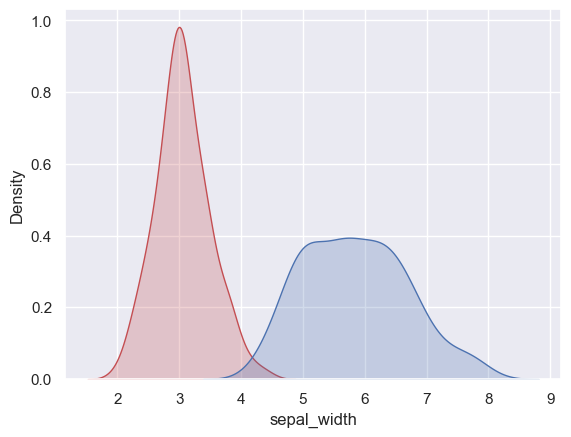

In [4]:
# Now making a density plot that I made back in Session 1

# Choosing multiple density plots
import seaborn as sns # import seaborn

df = sns.load_dataset('iris') # load iris dataset
sns.set_theme(style="darkgrid") # set seaborn theme
sns.kdeplot(df['sepal_width'], fill=True, color="r") # plot density of sepal width
sns.kdeplot(df['sepal_length'], fill=True, color="b") # plot density of sepal length
plt.show()

- I felt it was helpful to go line-by-line in some cases because I'm not totally familiar with some of the Matplotlib functions yet (eg. I've never changed the marker edge colour before). 
- I do a lot of data analysis and coding in my research, so I know the value of a good comment when returning to an old script! I find that good comments are explicit, track changes (e.g., why did you I do this function? When did I do it? What are these new lines in the code?), are concise, and are not just readable by me (i.e., if my collaborator(s) need to adjust code, they can easily do so using my comments). They're also key for review, i.e., ensuring it's readable by reviewers and reproducible by future researchers.

# Deck 5: Customizing our plots

In [5]:
# Changing up the data a bit now to follow along with this deck.

x = np.arange(50)
y1 = np.random.randint(0, 100,50)
y2 = np.random.randint(0, 100,50)

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_78467/379093289.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


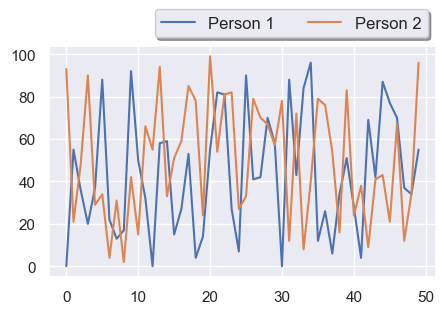

In [ ]:
### Activity: Recall (Using what we learned in lesson 1, can you make a line plot with both of our y variables on the same axes?) 
# --> Yes! But we'll need a legend, and the variables should have the same units of the DV.

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y1, label = "Person 1")
ax.plot(x,y2, label = "Person 2")
ax.legend(loc='lower right',
        frameon = True, #add frame around the legend
        fontsize = 12, #change font size
        ncol = 2, #specify number of columns
        shadow = True,
        bbox_to_anchor =(1, 1))
fig.show()

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_78467/2887380171.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


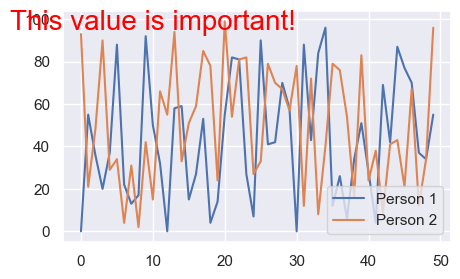

In [ ]:
# Text annotations using text()
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y1, label = "Person 1")
ax.plot(x,y2, label = "Person 2")
ax.legend(loc='lower right')
ax.text(10, 95, "This value is important!",
            ha='center',    #alignment of text
            color = 'red',  #modify font colour
            size = 20)      #modify font size
fig.show()

Text(0.2, 0.2, '. Figure:(0.2, 0.2)')

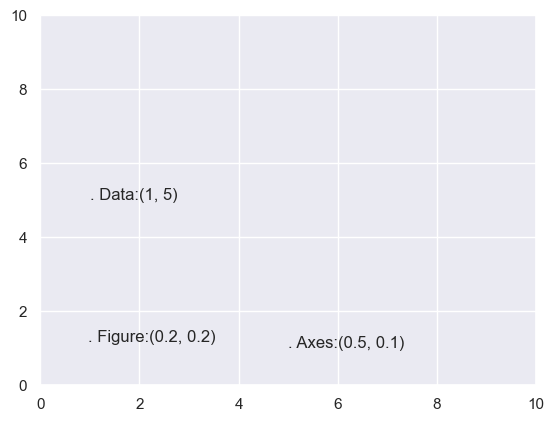

In [14]:
# Positioning text annotations
fig, ax = plt.subplots()
ax.axis([0, 10, 0, 10])
ax.text(1, 5, ". Data:(1, 5)",           transform=ax.transData    )
ax.text(0.5, 0.1, ". Axes:(0.5, 0.1)",   transform=ax.transAxes    )
ax.text(0.2, 0.2, ". Figure:(0.2, 0.2)", transform=fig.transFigure )

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_78467/187932087.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


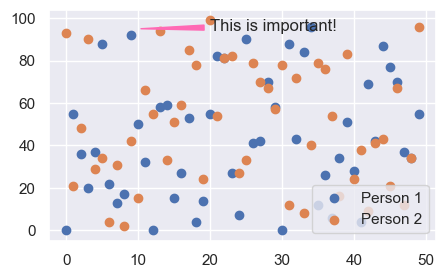

In [19]:
# Annotating with arrows
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc='lower right')
ax.annotate('This is important!', xy=(10, 95), xytext=(20, 94),
          arrowprops=dict(arrowstyle = "wedge",
              color='hotpink'))
fig.show()

# This seems more aligned with what I'd need in my own work - will definitely return to this!

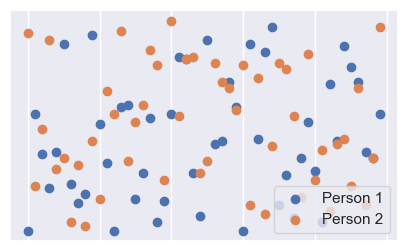

In [ ]:
# Removing axis labels

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc='lower right')
ax.yaxis.set_major_locator(plt.NullLocator()) # removes ticks and labels
ax.xaxis.set_major_formatter(plt.NullFormatter()) # removes labels but keeps ticks

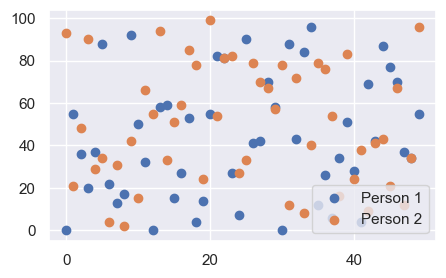

In [ ]:
# Limiting tick marks
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc='lower right')
ax.xaxis.set_major_locator(plt.MaxNLocator(3)) # setting max number of ticks

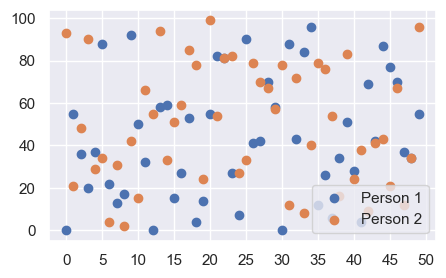

In [22]:
# Adjusting tick mark intervals using MultipleLocator
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc='lower right')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

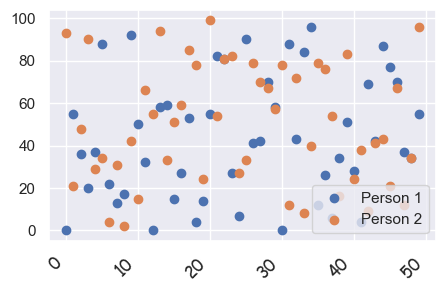

In [ ]:
# Rotating axis labels
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc="lower right")

plt.xticks(rotation=45, ha='right', size=20, font='Comic Sans MS') # with adjusted font and size!

Text(0.5, 0, 'Shiny New X Axis!')

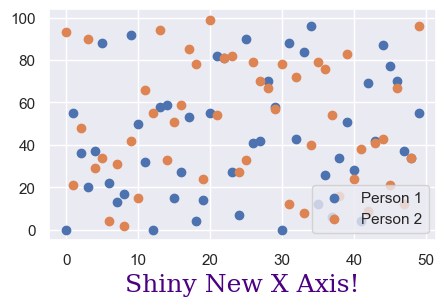

In [34]:
### Activity: Modifying axis title fonts (Can you use what we did in a previous lesson to modify our x axis title? We want a serif font with indigo colour, and for the axis title to be "Shiny New X Axis!")

# Define the font properties
font1 = {'family':'serif','color':'indigo'}
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x,y1, label = "Person 1")
ax.scatter(x,y2, label = "Person 2")
ax.legend(loc='lower right')
plt.xlabel("Shiny New X Axis!", fontsize = 18, fontdict = font1)

In [35]:
# Check out pre-made styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_78467/3738215761.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


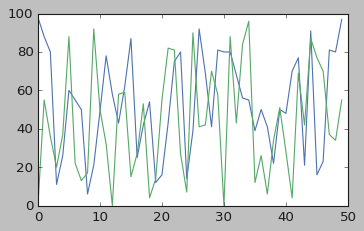

In [40]:
plt.style.use("classic")

np.random.seed(613)
x = np.arange(50)
y1 = np.random.randint(0, 100,50)
y2 = np.random.randint(0, 100,50)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y1)
ax.plot(x,y2)
fig.show()